In [1]:
import pandas as pd
import numpy as np
import re
import ast

In [2]:
#Como estructura de la carpeta de trabajo separe las resoluciones en pdf del excel inicial
path_herramientas = "..\\data\\original\\Resoluciones\\"
path_original = "..\\data\\original\\"

In [3]:
#Para aquellos que deseen chequear donde esta su carpeta de trabajo.
import os
os.getcwd()

'c:\\Users\\fede_\\Desktop\\ODSL\\nlp-juzgado\\notebooks'

## Exploracion de datos.

Mi primer enfoque es explotario. Para tratar de entender que variables se encuentran en este set de datos, enfoco des tres puntos de vista:
* Composición general del dataset: .info(), .shape()
* Medidas descriptivas: .describe()
* Lectura subjetiva: head()

A partir de ahí propondre un primer enfoque. Separo los datos del excel de los pdf que encararé con un walk y alguna librería que me permita transformar el pdf a dataframe (Estructura filas:columna). Frente a esto me imagino que me encontrare al conocido problema de la irregularidad de la composición de los pdfs.

In [4]:
set_unificado = pd.read_excel(path_original + "set_de_datos_unificado_juzgado.xlsx")

El dataset esta compuesto por 69 columnas (Variables) y 3835 filas (casos)

In [5]:
set_unificado.shape

(3835, 69)

Cómo ignorante total de las cuestiones legales, a simple vista en esta lectura de los nombres de las columnas se observan datos del juzgado, datos de las conductas, caracteristicas de la violencia y datos de la causa.

In [6]:
set_unificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3835 entries, 0 to 3834
Data columns (total 69 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   N                                                    2751 non-null   float64
 1   NRO_REGISTRO                                         3218 non-null   object 
 2   TOMO                                                 3219 non-null   float64
 3   FECHA_RESOLUCION                                     3371 non-null   object 
 4   N_EXPTE_EJE                                          3371 non-null   object 
 5   FIRMA                                                3371 non-null   object 
 6   MATERIA                                              3371 non-null   object 
 7   ART_INFRINGIDO                                       3351 non-null   object 
 8   CODIGO_O_LEY                                         3351 non-null  

In [7]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Imprimo las primeras rows del dataset pero lo transpongo para poder observar una fila completa. Las columnas momentaneamente estan donde van las filas y las filas donde van las columnas

In [8]:
set_unificado.head().T

2_8_2016                                           2_8_2016                                           2_8_2016
N_EXPTE_EJE                                                                                   9498_16                                            9904_16                                            1313_16                                            2894_16                                            3024_14
FIRMA                                                                                     Pablo_Casas                                        Pablo_Casas                                        Pablo_Casas                                        Pablo_Casas                                        Pablo_Casas
MATERIA                                                                                         penal                                              penal                                    contravencional                                    contravencional                                              penal
ART_INFRINGIDO                                                                                      1                                             149bis                                                 52                                                 73                                             149bis
CODIGO_O_LEY                                                                                ley_14346                          codigo_penal_de_la_nacion                             codigo_contravencional                             codigo_contravencional                          codigo_penal_de_la_nacion
CONDUCTA                                                                            proteccion_animal                                           amenazas                                      hostigamiento                                 incumplir_clausura                                           amenazas
CONDUCTA_DESCRIPCION                                                                          simples                                            simples                       agravado_violencia_de_genero                                                NaN                                            simples
VIOLENCIA_DE_GENERO                                                                                no                                                 si                                                 si                                                 no                                                 si
V_FISICA                                                                               no_corresponde                                                 no                                                 si                                     no_corresponde                                                 no
V_PSIC                                                                                 no_corresponde                                                 si                                                 si                                     no_corresponde                                                 si
V_ECON                                                                                 no_corresponde                                                 no                                                 si                                     no_corresponde                                                 si
V_SEX                                                                                  no_corresponde                                                 no                                                 no                                     no_corresponde                                                 no
V_SOC                                                                                  no_corresponde                                                 no                                                 no              

Además de llamarme la cantidad de missing values (¿Son denuncias que todavia no tienen  datos judiciales?), me llama la anteción los datos que contienen la columna link

In [9]:
pd.options.display.max_colwidth = 100

In [10]:
set_unificado.LINK.head()

0    https://drive.google.com/open?id=0B9wNhp3GjjazTVhZM2dCRU1IN2M
1    https://drive.google.com/open?id=0B9wNhp3GjjazTjRHVHl2YzBtUEU
2    https://drive.google.com/open?id=0B9wNhp3GjjazY3VCak5kdTBvWWc
3    https://drive.google.com/open?id=0B9wNhp3Gjjazc2V4eWVaeWVRQUE
4    https://drive.google.com/open?id=0B9wNhp3GjjazZFdmVXlWbFdYSHc
Name: LINK, dtype: object

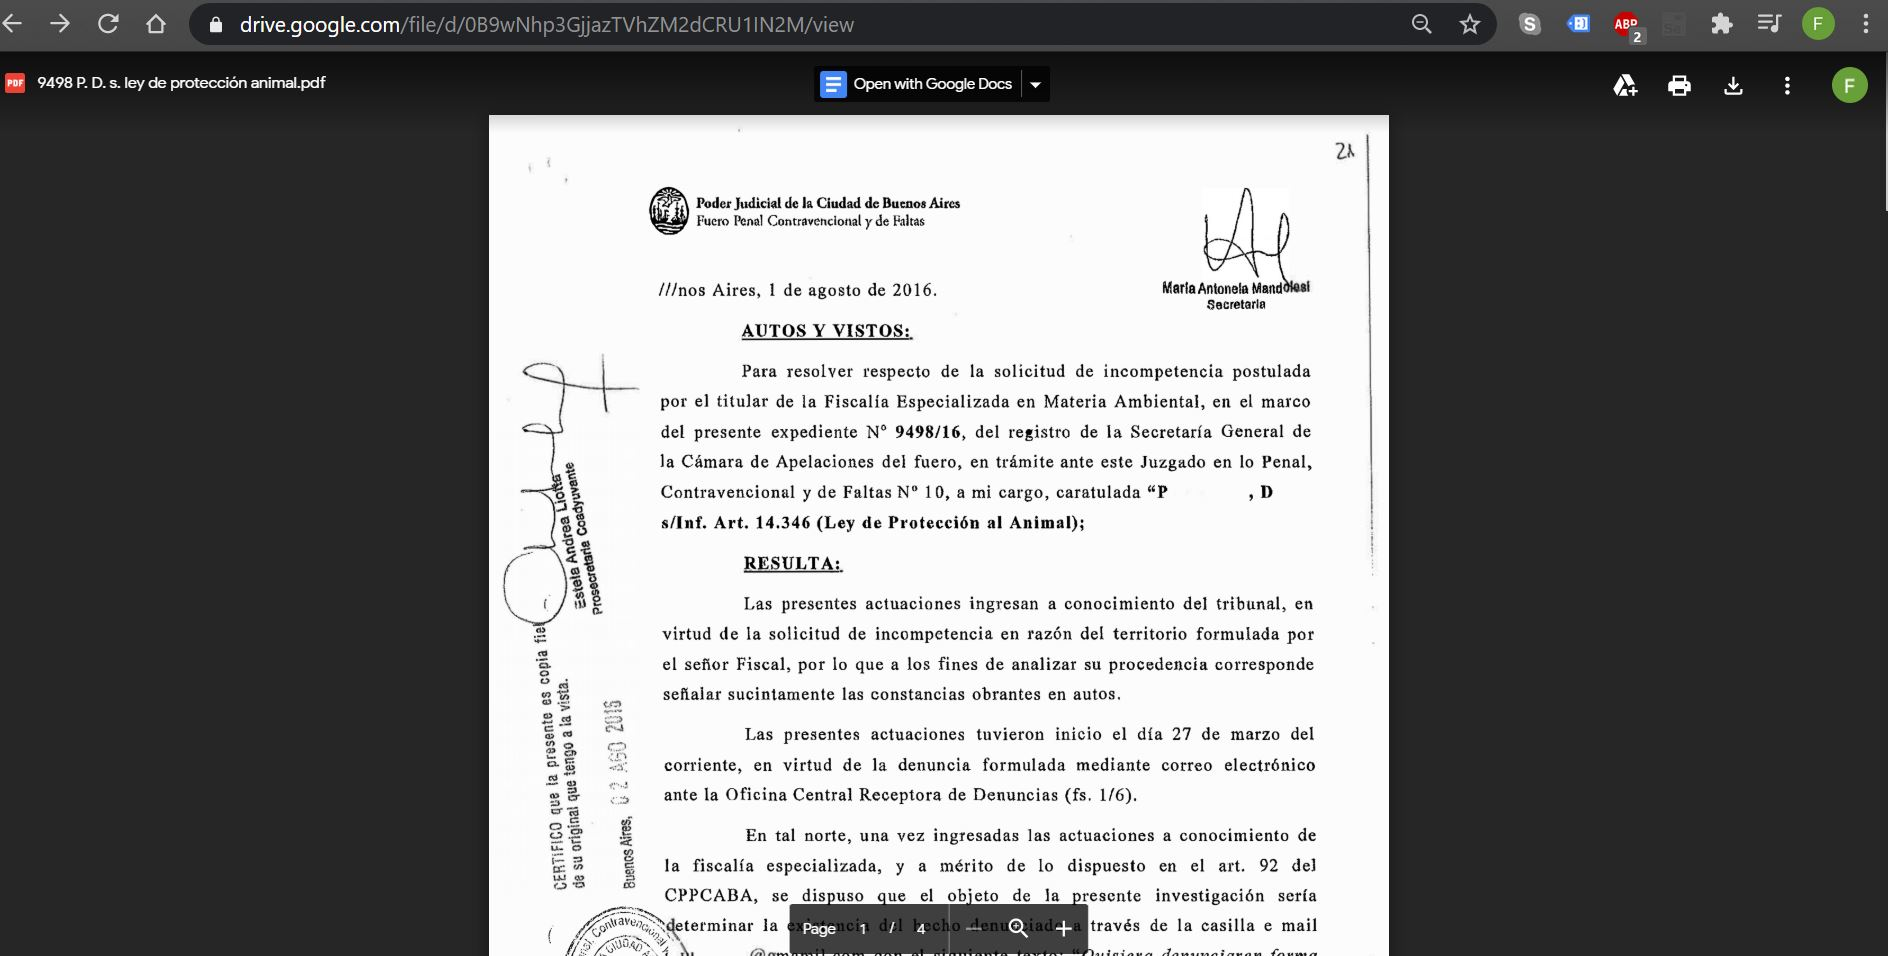

In [11]:
from IPython.display import Image
Image(filename='../caso.jpg') 


### Valores faltantes
Grafico que datos hay de faltantes. ¿Tiene sentido que falten esos datos?

In [12]:
dataset_faltantes = set_unificado.isnull().sum(axis=0).reset_index()
dataset_faltantes.columns = ['nombre_columna', 'cantidad_faltantes']
dataset_faltantes.head()

nombre_columna  cantidad_faltantes
0                 N                1084
1      NRO_REGISTRO                 617
2              TOMO                 616
3  FECHA_RESOLUCION                 464
4       N_EXPTE_EJE                 464

In [13]:
dataset_faltantes

nombre_columna  cantidad_faltantes
0                                                     N                1084
1                                          NRO_REGISTRO                 617
2                                                  TOMO                 616
3                                      FECHA_RESOLUCION                 464
4                                           N_EXPTE_EJE                 464
5                                                 FIRMA                 464
6                                               MATERIA                 464
7                                        ART_INFRINGIDO                 484
8                                          CODIGO_O_LEY                 484
9                                              CONDUCTA                 464
10                                 CONDUCTA_DESCRIPCION                2697
11                                  VIOLENCIA_DE_GENERO                 472
12                                             V_FISICA                 473
13                                               V_PSIC                 473
14                                               V_ECON                 473
15                                                V_SEX                 473
16                                                V_SOC                 473
17                                                V_AMB                 473
18                                               V_SIMB                 473
19                                      FRASES_AGRESION                3189
20                                     GENERO_ACUSADO/A                 475
21                               NACIONALIDAD_ACUSADO/A                 475
22                  EDAD_ACUSADO/A AL MOMENTO DEL HECHO                 475
23                          NIVEL_INSTRUCCION_ACUSADO/A                 631
24                                   GENERO_DENUNCIANTE                 475
25                             NACIONALIDAD_DENUNCIANTE                 475
26                EDAD_DENUNCIANTE_AL_MOMENTO_DEL_HECHO                 475
27                        NIVEL_INSTRUCCION_DENUNCIANTE                 475
28                                DOMICILIO_DENUNCIANTE                 475
29                                 ASENTAMIENTO_O_VILLA                 475
30                                 FRECUENCIA_EPISODIOS                 475
31        RELACION_Y_TIPO_ENTRE_ACUSADO/A_Y_DENUNCIANTE                 475
32                                    HIJOS/AS_EN_COMUN                 475
33  MEDIDAD DE PROTECCION VIGENTES AL MOMENTO DEL HECHO                 475
34                                       ZONA_DEL_HECHO                 474
35                                    LUGAR_DEL_HECHO\n                 478
36                               ASENTAMIENTO_O_VILLA.1                 474
37                                      FECHA_DEL_HECHO                 773
38                            FECHA_DE_INICIO_DEL_HECHO                3531
39                      FECHA_DE_FINALIZACIÓN_DEL_HECHO                3531
40                                   TIPO_DE_RESOLUCION                 464
41                              OBJETO_DE_LA_RESOLUCION                 464
42                                              DETALLE                 753
43                                             DECISION                 464
44                                         ORAL_ESCRITA                 464
45                                       HORA_DE_INICIO                2390
46                                       HORA_DE_CIERRE                2415
47                                                 LINK                 483
48                                     MODELO_DESTACADO                3835
49                                             DURACION                   4
50                                     SI/NO_RECURRENTE                1836
51                       DECISION_CAMARA_DE_APELACIONES                2854
52           

In [14]:
dataset_faltantes = dataset_faltantes.loc[dataset_faltantes['cantidad_faltantes']>0]
dataset_faltantes = dataset_faltantes.sort_values(by='cantidad_faltantes')
ind = np.arange(dataset_faltantes.shape[0])

In [15]:
import seaborn as sns

import matplotlib as plt

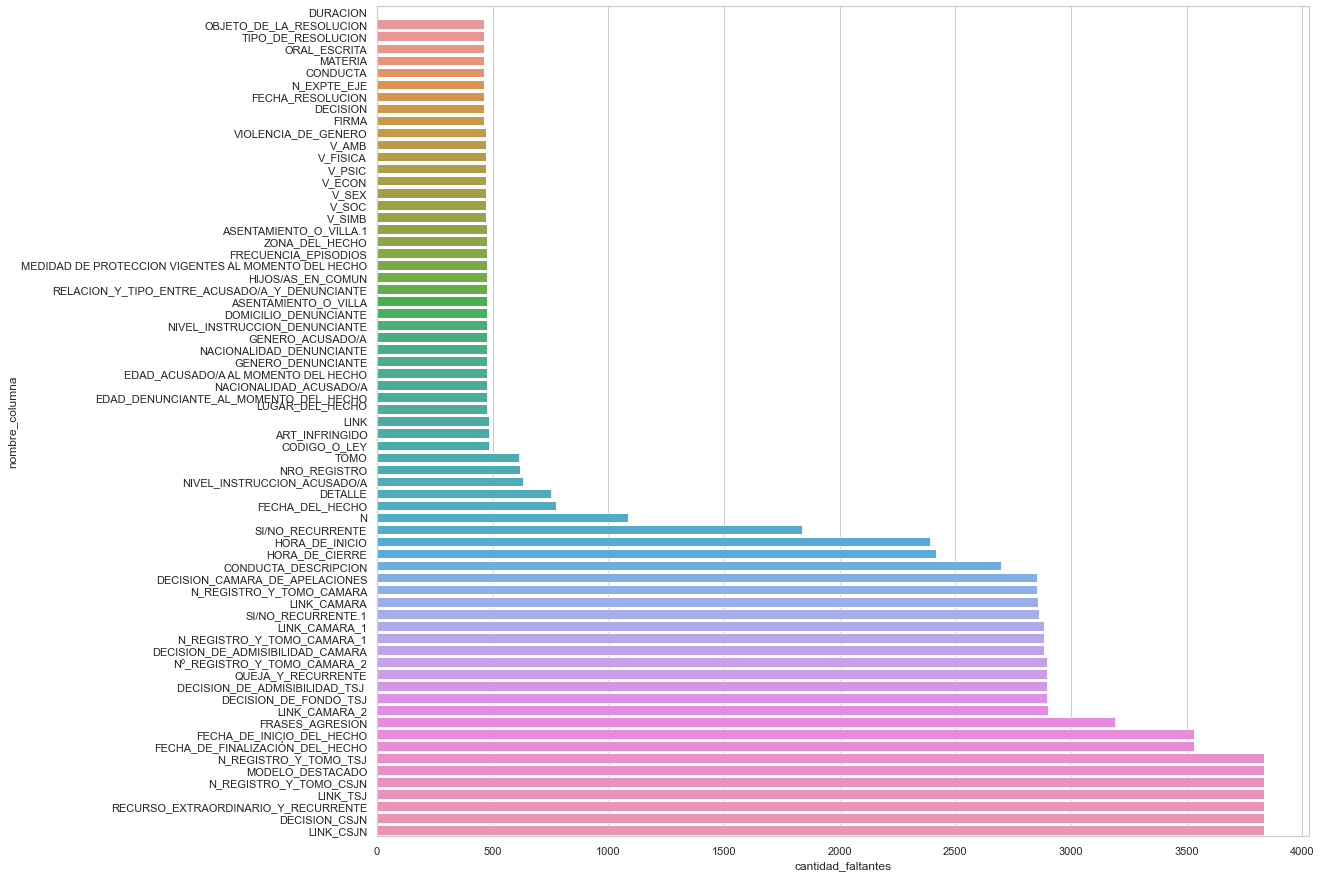

In [16]:
sns.set(style="whitegrid", color_codes=True,rc={'figure.figsize':(16.7,15.27)})
sns.barplot(x = 'cantidad_faltantes', y = 'nombre_columna', data=dataset_faltantes)
#sns.xticks(rotation = 90)
#sns.show()

In [17]:
set_unificado.CONDUCTA_DESCRIPCION

0                            simples
1                            simples
2       agravado_violencia_de_genero
3                                NaN
4                            simples
                    ...             
3830                             NaN
3831                             NaN
3832                             NaN
3833                             NaN
3834                             NaN
Name: CONDUCTA_DESCRIPCION, Length: 3835, dtype: object

## Primeras preguntas

1. ¿Cuantos casos de violencia hay por fecha? ¿Hay algún tipo de estacionalidad? Tengo el sesgo injustificado de creer que en ciertos momentos del año (navidad, año nuevo) aumentan los casos de violencia. Voy a plotear cantidad por año
2. ¿Cómo se distribuyen los tipos de violencia? ¿En cual hay mas frecuencia?
 [CONDUCTA] y [LEY]
 Puedo hacer un corplot entre tipos de violencia y leyes involucradas? Deberia haber cierta correlación o tal vez hay detalles que se escapen de estas dos variables 
4.GENERO_ACUSADO/A	

In [34]:
set_unificado = set_unificado[set_unificado["VIOLENCIA_DE_GENERO"] == "si"]

In [35]:
len(set_unificado["FECHA_DEL_HECHO"] == set_unificado.FECHA_DEL_HECHO.isnull)

891

In [36]:
set_unificado["FECHA_DEL_HECHO"].describe()

count         666
unique        257
top       27/2/17
freq           11
Name: FECHA_DEL_HECHO, dtype: object

In [37]:
set_unificado['FECHA_DEL_HECHO'] = set_unificado['FECHA_DEL_HECHO'].str.replace(r'[_]', '/')
set_unificado["FECHA_DEL_HECHO"].describe()

count         666
unique        257
top       27/2/17
freq           11
Name: FECHA_DEL_HECHO, dtype: object

In [38]:
import re

In [39]:
fechas = set_unificado["FECHA_DEL_HECHO"]
fechas = fechas.to_frame()

In [40]:
fechas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 3358
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   FECHA_DEL_HECHO  666 non-null    object
dtypes: object(1)
memory usage: 13.9+ KB


In [41]:
fechas = fechas.applymap(str)

In [42]:
fechas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 3358
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   FECHA_DEL_HECHO  891 non-null    object
dtypes: object(1)
memory usage: 13.9+ KB


In [43]:
#r"(\d{0,2})/(\d{0,2})/(\d{0,2})"

In [44]:
scripts = []
for i in fechas["FECHA_DEL_HECHO"]:
    script_iterator  = re.finditer(r"(\d{0,2})/(\d{0,2})/(\d{0,2})",str(i))
    for match in script_iterator:
        dia = match.group(1)
        mes = match.group(2)
        año = match.group(3)
    
    scripts.append([dia,mes,año])
    scripts


In [45]:
df_fecha = pd.DataFrame(scripts)
df_fecha.columns = ["dias","mes","año"]
df_fecha

dias mes año
0     25   3  16
1     24   7  14
2      5  01  14
3      8  07  16
4     21   8  14
..   ...  ..  ..
886   28  10  17
887   28  10  17
888   28  10  17
889   03  11  19
890   03  11  19

[891 rows x 3 columns]

In [46]:
df_fecha["mes"] = df_fecha["mes"].apply(pd.to_numeric)


In [47]:
df_fecha["mes"].max()

12

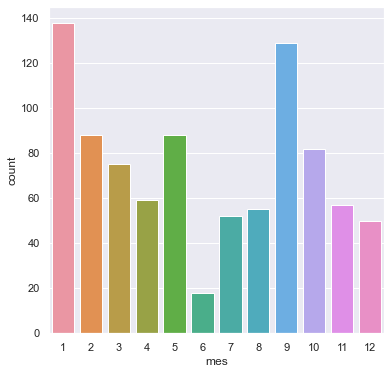

In [51]:
sns.set(style="whitegrid", color_codes=True,rc={'figure.figsize':(6,6)})
sns.countplot(df_fecha["mes"])

In [49]:
df_fecha["año"] = df_fecha["año"].apply(pd.to_numeric)
df_fecha["año"].max()



20

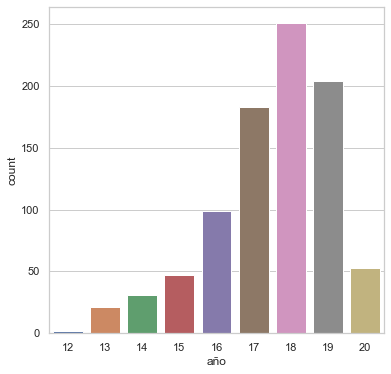

In [50]:
sns.set(style="whitegrid", color_codes=True,rc={'figure.figsize':(6,6)})
sns.countplot(df_fecha["año"])

Dado que observo un gran error en las fechas, voy a consultar primero y luego continuar con el analisis de las fechas

# ACLARACION

Entiendo que hay un filtro que no hice con respecto a los casos especificos de violencia de genero.
Aclaro nuevamente este script es de un participante del resto y no es oficial. Por lo cual es un primer enfoque amateur con total desconocimiento de los datos y las caracteristicas especificas.
